In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wind-turbine-scada-dataset/T1.csv


**Inspect the data to find out the number of rows, columns and the data structure **

In [9]:
df = pd.read_csv("/kaggle/input/wind-turbine-scada-dataset/T1.csv")
print("df shape:", df.shape)
print(df.info())
df.head()

df shape: (50530, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB
None


,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


**Convert Date/Time column to DateTimeIndex**

In [24]:
date_string = "2018-01-01"
start_date = pd.to_datetime(date_string, format="%Y-%m-%d")
end_date = start_date + pd.DateOffset(years=1)
time_series = pd.date_range(start=start_date, end=end_date, freq="10min")
time_series

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:10:00',
               '2018-01-01 00:20:00', '2018-01-01 00:30:00',
               '2018-01-01 00:40:00', '2018-01-01 00:50:00',
               '2018-01-01 01:00:00', '2018-01-01 01:10:00',
               '2018-01-01 01:20:00', '2018-01-01 01:30:00',
               ...
               '2018-12-31 22:30:00', '2018-12-31 22:40:00',
               '2018-12-31 22:50:00', '2018-12-31 23:00:00',
               '2018-12-31 23:10:00', '2018-12-31 23:20:00',
               '2018-12-31 23:30:00', '2018-12-31 23:40:00',
               '2018-12-31 23:50:00', '2019-01-01 00:00:00'],
              dtype='datetime64[ns]', length=52561, freq='10T')

In [25]:
df["Date/Time"] = pd.to_datetime(df["Date/Time"], format="%Y-%m-%d")
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286


**Set the index of your DataFrame to Date/Time**

In [29]:
df = df.set_index("Date/Time")
df.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
Date/Time,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286


**Convert the time from UTC to "Africa/Nairobi"**

In [30]:
df.index = df.index.tz_localize("UTC").tz_convert("Africa/Nairobi")
df.head()
#df["Date/Time"].tail()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
Date/Time,,,,
2018-01-01 03:00:00+03:00,380.047791,5.311336,416.328908,259.994904
2018-01-01 03:10:00+03:00,453.769196,5.672167,519.917511,268.641113
2018-01-01 03:20:00+03:00,306.376587,5.216037,390.900016,272.564789
2018-01-01 03:30:00+03:00,419.645905,5.659674,516.127569,271.258087
2018-01-01 03:40:00+03:00,380.650696,5.577941,491.702972,265.674286


**Run the cell below to make sure the index of of DataFrame is an instance of DatetimeIndex**

In [32]:
assert isinstance(df.index, pd.DatetimeIndex)

**Convert Wind Direction (°) column to radians**

In [44]:
df["radians"] = np.radians(df["Wind Direction (°)"])
df.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),radians
Date/Time,,,,,
2018-01-01 03:00:00+03:00,380.047791,5.311336,416.328908,259.994904,4.537767
2018-01-01 03:10:00+03:00,453.769196,5.672167,519.917511,268.641113,4.688672
2018-01-01 03:20:00+03:00,306.376587,5.216037,390.900016,272.564789,4.757153
2018-01-01 03:30:00+03:00,419.645905,5.659674,516.127569,271.258087,4.734347
2018-01-01 03:40:00+03:00,380.650696,5.577941,491.702972,265.674286,4.636891


**Create cosθ col**

In [45]:
df["cosθ"] = np.cos(df["radians"])
df.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),radians,cosθ
Date/Time,,,,,,
2018-01-01 03:00:00+03:00,380.047791,5.311336,416.328908,259.994904,4.537767,-0.173736
2018-01-01 03:10:00+03:00,453.769196,5.672167,519.917511,268.641113,4.688672,-0.023715
2018-01-01 03:20:00+03:00,306.376587,5.216037,390.900016,272.564789,4.757153,0.044749
2018-01-01 03:30:00+03:00,419.645905,5.659674,516.127569,271.258087,4.734347,0.021956
2018-01-01 03:40:00+03:00,380.650696,5.577941,491.702972,265.674286,4.636891,-0.075426


**Create sinθ column**

In [52]:
df["sinθ"] = np.sin(df["radians"])
df.tail()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),radians,cosθ,sinθ
Date/Time,,,,,,,
2019-01-01 02:10:00+03:00,2963.980957,11.404030,3397.190793,80.502724,1.405038,0.165001,0.986293
2019-01-01 02:20:00+03:00,1684.353027,7.332648,1173.055771,84.062599,1.467169,0.103442,0.994636
2019-01-01 02:30:00+03:00,2201.106934,8.435358,1788.284755,84.742500,1.479036,0.091632,0.995793
2019-01-01 02:40:00+03:00,2515.694092,9.421366,2418.382503,84.297913,1.471276,0.099356,0.995052
2019-01-01 02:50:00+03:00,2820.466064,9.979332,2779.184096,82.274620,1.435963,0.134425,0.990924


**Create small vector(v) column**

**A vector quantity is a physical Quantity that has both magnitude and direction e.g Force, Velocity, Acceleration, displacement**

In [53]:
df["v"] = df["Wind Speed (m/s)"] * df["cosθ"]
df.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),radians,cosθ,sinθ,v
Date/Time,,,,,,,,
2018-01-01 03:00:00+03:00,380.047791,5.311336,416.328908,259.994904,4.537767,-0.173736,-0.984792,-0.922769
2018-01-01 03:10:00+03:00,453.769196,5.672167,519.917511,268.641113,4.688672,-0.023715,-0.999719,-0.134514
2018-01-01 03:20:00+03:00,306.376587,5.216037,390.900016,272.564789,4.757153,0.044749,-0.998998,0.233413
2018-01-01 03:30:00+03:00,419.645905,5.659674,516.127569,271.258087,4.734347,0.021956,-0.999759,0.124264
2018-01-01 03:40:00+03:00,380.650696,5.577941,491.702972,265.674286,4.636891,-0.075426,-0.997151,-0.420723


**Create a Scallar Quantity Column**

**Scallar quantity is a physical Quantity that only has magnitude with no direction e.g mass, distance**

In [54]:
df["u"] = df["Wind Speed (m/s)"] * df["sinθ"]
df.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),radians,cosθ,sinθ,v,u
Date/Time,,,,,,,,,
2018-01-01 03:00:00+03:00,380.047791,5.311336,416.328908,259.994904,4.537767,-0.173736,-0.984792,-0.922769,-5.230563
2018-01-01 03:10:00+03:00,453.769196,5.672167,519.917511,268.641113,4.688672,-0.023715,-0.999719,-0.134514,-5.670572
2018-01-01 03:20:00+03:00,306.376587,5.216037,390.900016,272.564789,4.757153,0.044749,-0.998998,0.233413,-5.210812
2018-01-01 03:30:00+03:00,419.645905,5.659674,516.127569,271.258087,4.734347,0.021956,-0.999759,0.124264,-5.658310
2018-01-01 03:40:00+03:00,380.650696,5.577941,491.702972,265.674286,4.636891,-0.075426,-0.997151,-0.420723,-5.562052


**Check for missing values**

In [57]:
df.isna()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),radians,cosθ,sinθ,v,u
Date/Time,,,,,,,,,
2018-01-01 03:00:00+03:00,False,False,False,False,False,False,False,False,False
2018-01-01 03:10:00+03:00,False,False,False,False,False,False,False,False,False
2018-01-01 03:20:00+03:00,False,False,False,False,False,False,False,False,False
2018-01-01 03:30:00+03:00,False,False,False,False,False,False,False,False,False
2018-01-01 03:40:00+03:00,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2019-01-01 02:10:00+03:00,False,False,False,False,False,False,False,False,False
2019-01-01 02:20:00+03:00,False,False,False,False,False,False,False,False,False
2019-01-01 02:30:00+03:00,False,False,False,False,False,False,False,False,False


**Check for the sum of all Missing values**

In [58]:
df.isna().sum()

LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
radians                          0
cosθ                             0
sinθ                             0
v                                0
u                                0
dtype: int64

In [67]:
import matplotlib.pyplot as plt

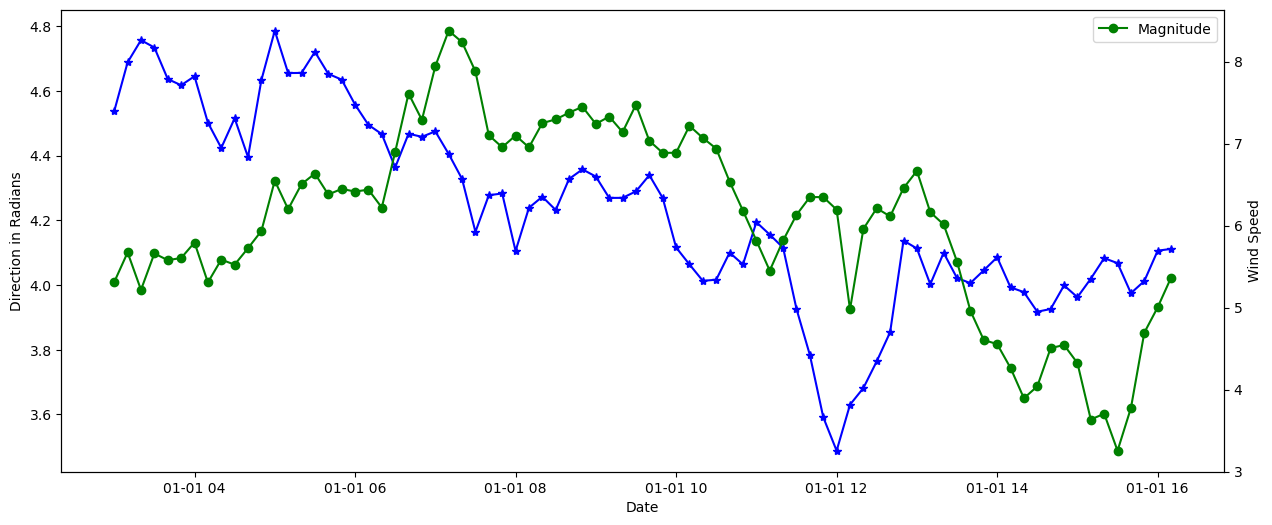

In [83]:
fig, ax1 = plt.subplots(figsize=[15,6])
ax1.plot(df["radians"].head(80), color="blue", label="Direction", marker="*")
ax1.set_xlabel("Date")
ax1.set_ylabel("Direction in Radians")
#set another y axis
ax2= ax1.twinx()
ax2.plot(df["Wind Speed (m/s)"].head(80), color="green", label="Magnitude", marker="o")
ax2.set_ylabel("Wind Speed")
plt.legend();

In [ ]:
pip install windrose

In [86]:
import windrose

In [87]:
from windrose import WindroseAxes

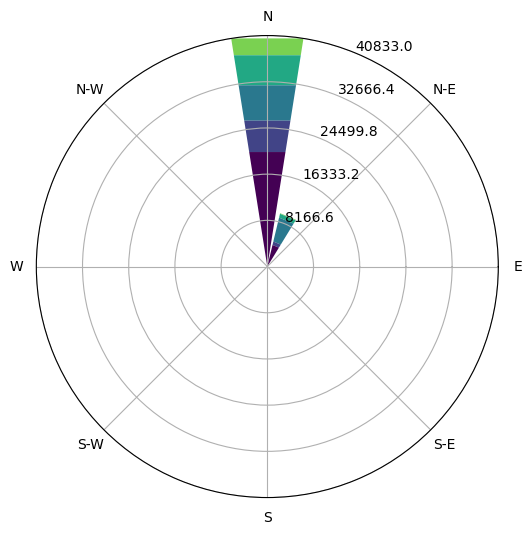

In [96]:
fig, ax = plt.subplots(figsize=(6,6), subplot_kw = {"projection": "windrose"})
ax.bar(df["Wind Speed (m/s)"], df["Wind Direction (°)"])
plt.show();